# Actividades

Mendoza Hernández Carlos Emiliano

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
import numpy as np
import altair as alt

## A.1

A partir de los datos “DatosAcademicos.csv” proponer 2 representaciones
visuales de los datos.

### Lectura y preprocesamiento de datos

In [2]:
# Leer el archivo CSV
data = pd.read_csv('DatosAcademicos.csv', encoding='latin1', header=[0,1])

# Eliminar columnas vacias
data = data.drop(columns=[('Unnamed: 5_level_0', 'Unnamed: 5_level_1'),
                          ('Unnamed: 10_level_0', 'Unnamed: 10_level_1'),
                          ('Unnamed: 15_level_0', 'Unnamed: 15_level_1'),
                          ('Unnamed: 20_level_0', 'Unnamed: 20_level_1'),
                          ('Unnamed: 25_level_0', 'Unnamed: 25_level_1')])
data

,Académico,Artículos Publicados,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Artículos Aceptados,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Artículos en Repositorios,...,Unnamed: 18_level_0,Unnamed: 19_level_0,Cursos de Posgrado Frente a Grupo,Unnamed: 22_level_0,Unnamed: 23_level_0,Unnamed: 24_level_0,Cursos de Licenciatura Frente a Grupo,Unnamed: 27_level_0,Unnamed: 28_level_0,Unnamed: 29_level_0
,Unnamed: 0_level_1,2020,2021,2022,2023,2020,2021,2022,2023,2020,...,2022,2023,2020,2021,2022,2023,2020,2021,2022,2023
0,A,2,0,0,1,0,0,0,0,0,...,0,0,2,2,2,2,0,0,0,0
1,B,3,2,0,0,0,2,1,0,0,...,0,1,0,2,1,1,0,0,0,0
2,C,2,3,1,4,0,1,0,0,0,...,0,0,2,2,2,2,2,2,2,0
3,D,2,2,1,1,1,0,0,0,0,...,0,0,4,1,2,1,0,1,1,1
4,E,6,4,5,7,0,0,3,0,0,...,0,2,2,2,2,0,0,0,0,0
5,F,0,0,1,2,0,0,0,1,0,...,4,3,0,2,3,2,0,3,1,1
6,G,0,0,0,1,0,0,0,1,0,...,0,1,0,4,5,0,0,0,0,1
7,H,1,3,2,3,0,0,0,0,0,...,2,1,0,0,0,0,2,2,2,2
8,I,1,2,2,1,0,0,0,1,3,...,0,0,2,2,1,1,0,0,0,0


In [3]:
data.columns

MultiIndex([(                            'Académico', 'Unnamed: 0_level_1'),
            (                 'Artículos Publicados',               '2020'),
            (                   'Unnamed: 2_level_0',               '2021'),
            (                   'Unnamed: 3_level_0',               '2022'),
            (                   'Unnamed: 4_level_0',               '2023'),
            (                  'Artículos Aceptados',               '2020'),
            (                   'Unnamed: 7_level_0',               '2021'),
            (                   'Unnamed: 8_level_0',               '2022'),
            (                   'Unnamed: 9_level_0',               '2023'),
            (            'Artículos en Repositorios',               '2020'),
            (                  'Unnamed: 12_level_0',               '2021'),
            (                  'Unnamed: 13_level_0',               '2022'),
            (                  'Unnamed: 14_level_0',               '2023'),

In [4]:
# Definir las columnas y tipos
columns = {
    'Artículos Publicados': 'Publicados',
    'Artículos Aceptados': 'Aceptados',
    'Artículos en Repositorios': 'Repositorios',
    'Artículos en Memorias': 'Memorias',
    'Cursos de Posgrado Frente a Grupo': 'Posgrado',
    'Cursos de Licenciatura Frente a Grupo': 'Licenciatura'
}

# Crear una lista para almacenar los dataframes
dfs = []

# Iterar sobre las columnas y tipos para crear y procesar los dataframes
i = 2
for col_name, tipo in columns.items():
    df = data[[('Académico', 'Unnamed: 0_level_1'),
               (col_name, '2020'),
               ('Unnamed: ' + str(i) + '_level_0', '2021'),
               ('Unnamed: ' + str(i + 1) + '_level_0', '2022'),
               ('Unnamed: ' + str(i + 2) + '_level_0', '2023')]].copy()
    df.columns = ['Académico', 2020, 2021, 2022, 2023]
    df.loc[:, 'Tipo'] = tipo
    dfs.append(df.melt(id_vars=['Académico', 'Tipo'], var_name='Año', value_name='Cantidad'))
    i+=5

# Unir todos los dataframes
data = pd.concat(dfs)

# Exportar el dataframe a un archivo CSV
data.to_csv('DatosAcademicosProcesados.csv', index=False)

### Gráficas

Basada en https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib/

Primera propuesta:
Se crean subplots para cada año, donde se muestran las publicaciones por académico y tipo. Cada tipo de publicación se representa con un color diferente.

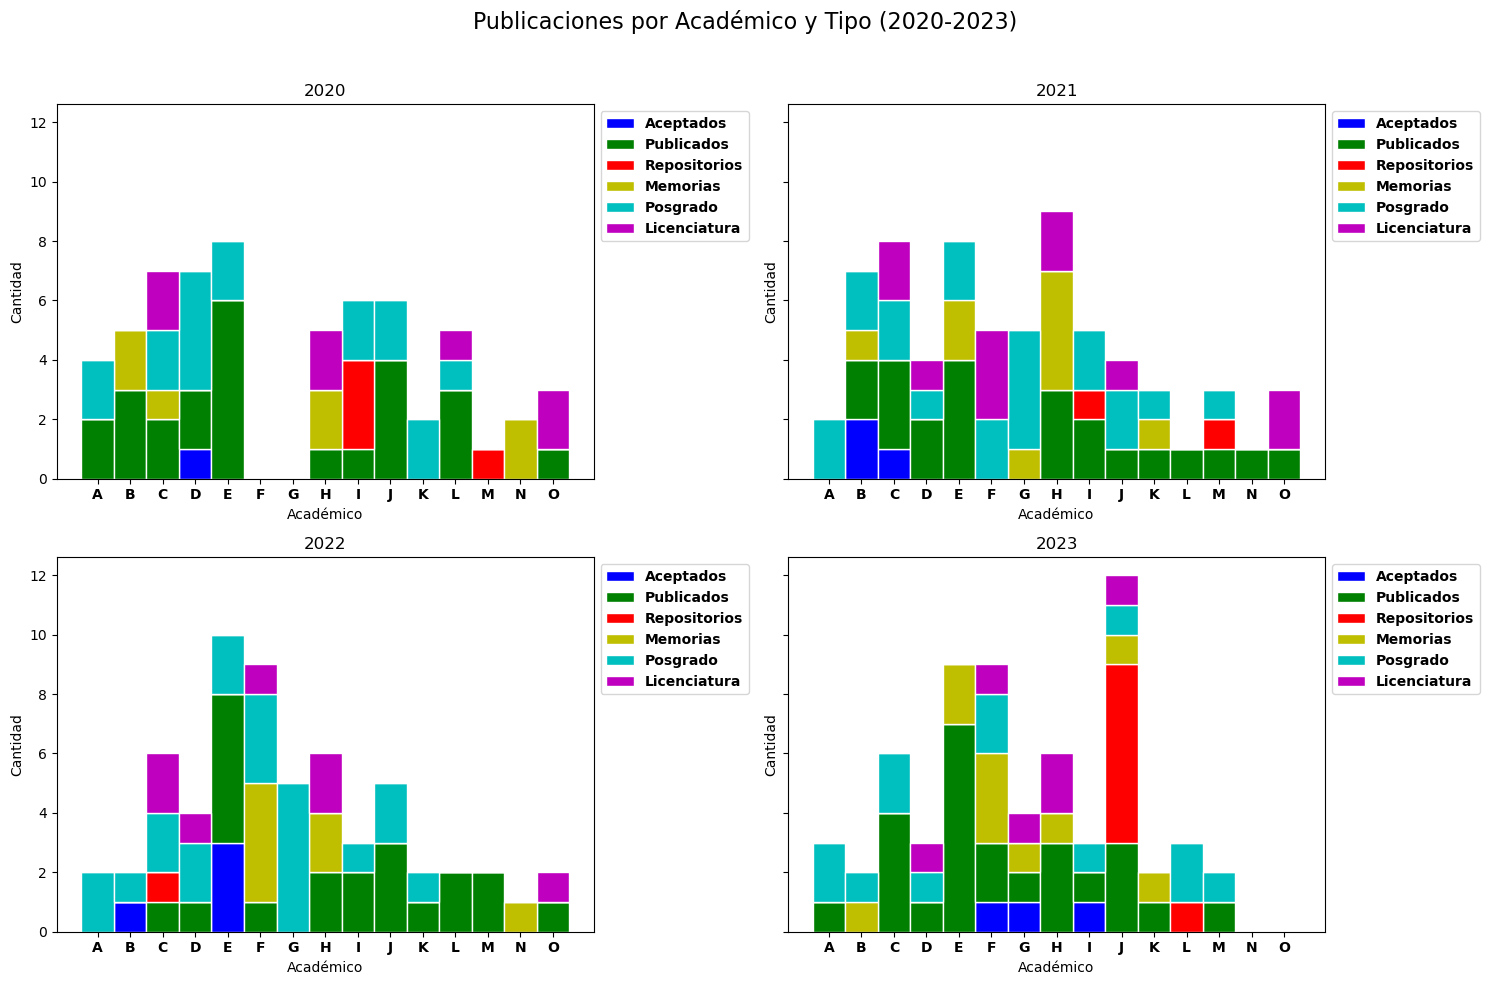

In [5]:
# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

# Lista de años para los subplots
years = [2020, 2021, 2022, 2023]

# Iterar sobre los años y ejes para crear los subplots
for ax, year in zip(axes.flatten(), years):
    # y-axis in bold
    rc('font', weight='bold')

    # Values of each group for the current year
    bars1 = list(data[(data['Tipo'] == 'Aceptados') & (data['Año'] == year)]['Cantidad'])
    bars2 = list(data[(data['Tipo'] == 'Publicados') & (data['Año'] == year)]['Cantidad'])
    bars3 = list(data[(data['Tipo'] == 'Repositorios') & (data['Año'] == year)]['Cantidad'])
    bars4 = list(data[(data['Tipo'] == 'Memorias') & (data['Año'] == year)]['Cantidad'])
    bars5 = list(data[(data['Tipo'] == 'Posgrado') & (data['Año'] == year)]['Cantidad'])
    bars6 = list(data[(data['Tipo'] == 'Licenciatura') & (data['Año'] == year)]['Cantidad'])

    r = list(range(len(bars1)))
    names = ['A','B','C','D','E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
    barwidth = 1

    # Create level 1
    ax.bar(r, bars1, color='b', edgecolor='white', width=barwidth, label='Aceptados')

    # Create level 2
    ax.bar(r, bars2, bottom=bars1, color='g', edgecolor='white', width=barwidth, label='Publicados')

    # Create level 3
    ax.bar(r, bars3, bottom=np.add(bars1, bars2).tolist(), color='r', edgecolor='white', width=barwidth, label='Repositorios')

    # Create level 4
    ax.bar(r, bars4, bottom=np.add(np.add(bars1, bars2), bars3).tolist(), color='y', edgecolor='white', width=barwidth, label='Memorias')

    # Create level 5
    ax.bar(r, bars5, bottom=np.add(np.add(np.add(bars1, bars2), bars3), bars4).tolist(), color='c', edgecolor='white', width=barwidth, label='Posgrado')

    # Create level 6
    ax.bar(r, bars6, bottom=np.add(np.add(np.add(np.add(bars1, bars2), bars3), bars4), bars5).tolist(), color='m', edgecolor='white', width=barwidth, label='Licenciatura')

    # Custom X axis
    ax.set_xticks(r)
    ax.set_xticklabels(names, fontweight='bold')
    ax.set_xlabel("Académico")

    # Custom Y axis
    ax.set_ylabel("Cantidad")

    # Add a legend
    ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

    # Set title
    ax.set_title(year)

# Agregar el título principal
fig.suptitle('Publicaciones por Académico y Tipo (2020-2023)', fontsize=16)

# Ajustar el diseño de la figura
plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()

Segunda propuesta, basada en:
https://altair-viz.github.io/gallery/bar_faceted_stacked.html

Se crea un gráfico de barras apiladas con facetas para cada año, donde se muestran las publicaciones por académico y tipo. Cada tipo de publicación se representa con un color diferente. La distribución de los datos es más clara y se puede observar la cantidad de publicaciones por académico y tipo en cada año.
Además, se puede observar la evolución de las publicaciones a lo largo de los años.

In [6]:
chart = alt.Chart(data).mark_bar().encode(
    column="Año:O",
    x="Cantidad",
    y="Académico",
    color="Tipo",
).properties(width=220,
             title = "Publicaciones por Académico y Tipo (2020-2023)")

chart.configure_title(
    fontSize=20,
    anchor='start',
    color='black',
)

alt.Chart(...)

### Conclusiones

La primera propuesta muestra la cantidad de publicaciones por académico y tipo en cada año, pero la distribución de los datos no tan es clara al agruparlo en subplots y no se puede observar tan bien la evolución de las publicaciones a lo largo de los años. Por otro lado, la segunda propuesta muestra la cantidad de publicaciones por académico y tipo en cada año, la distribución de los datos es más clara y se puede observar la evolución de las publicaciones a lo largo de los años. Por lo tanto, la segunda propuesta es más adecuada para visualizar los datos.

Fue complicado pensar en maneras de representar tantas dimensiones en una sola gráfica, por lo que se optó por dividir los datos en subplots y facetas para facilitar la visualización de los datos.